# Read Experimental Data
 This `notebook` goes over how to read the recorded experimental data with __*synapse*__.
 We will go over every step
 1. Select and load the experiment data
 2. Conversion into matrix format for plotting and analysis
 3. Obtain <font color = green>FFT</font> 
 4. Plot!

### alright let's do _this_!
<br>
***
First lets import the libraries that we will be using:

In [2]:
import tdt # These are the functions for tdt
import pandas as pd 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt # this is used for plotting

We ask for the directory where the experiment is!

In [6]:
from tkinter import Tk, filedialog
root = Tk() # pointing root to Tk() to use it as Tk() in program.
root.withdraw() # Hides small tkinter window.
root.attributes('-topmost', True) # Opened windows will be active. above all windows despite of selection.
exp_path = filedialog.askdirectory(parent=root, initialdir='C:/TDT/Synapse/Tanks',title= 'Hello! Please select the experiment to load!') # Returns opened path as str
print(exp_path)


A:/ExpData_Tank/VPL_RecStim_Coordinates-220606-153952/sub_1-220606-164504


### Import the synapse data!
Now we know the path to the directory where the data is so we load it using the __*`tdt`*__ functions

In [7]:
data = tdt.read_block(exp_path)

read from t=0s to t=60.5s


### Plot the stimulation streams as they are

<function matplotlib.pyplot.show(close=None, block=None)>

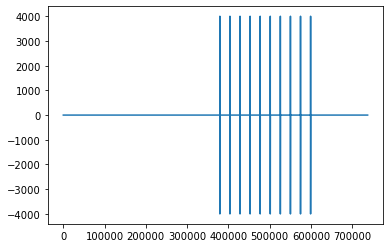

In [8]:
plt.figure(0)
plt.plot(data.streams.eS1r.data[0,:])
plt.show

### Plotting all recording after stim

In [7]:
plt.figure(1)
for pulse in range(0,np.size(peak_locs)):
    start_idx = int(lfp_locs[pulse]-305)
    end_idx = int(lfp_locs[pulse]+3052)
    stacked_responses[:,:,pulse] = lfp_data[:,start_idx:end_idx]
    plt.plot(time_vect,stacked_responses[0,:,pulse]+.0003*pulse)

plt.show

NameError: name 'peak_locs' is not defined

<Figure size 432x288 with 0 Axes>

### Average Response to stimulation

In [8]:
plt.figure(2)
avg_response = np.mean(stacked_responses,axis=2)
std_dev_response = np.std(stacked_responses,axis=2)
plt.plot(time_vect,avg_response[0,:],color='b')
#plt.plot(time_vect,avg_response[0,:]+std_dev_response[0,:],linestyle=':',color='b')
#plt.plot(time_vect,avg_response[0,:]-std_dev_response[0,:],linestyle=':',color='b')
plt.ylim(-0.0004,0.0004)
plt.show()


NameError: name 'stacked_responses' is not defined

<Figure size 432x288 with 0 Axes>

### Doing preliminary spectral analysis
Things to do still:
- normalize
- Check fft parameters. If possible do it with wavelets.


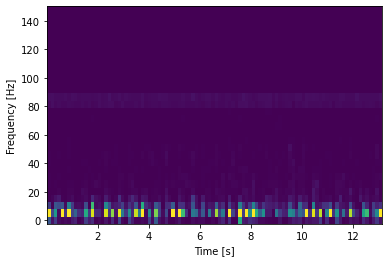

In [18]:
fs_lfp = data.streams.TET1.fs
fs_stim = data.streams.eS1r.fs
peaks = scipy.signal.find_peaks(data.streams.eS1r.data[0,:],height=100,distance=8)
peak_locs = peaks[0]
lfp_locs = peak_locs*fs_lfp//fs_stim
time_vect = np.arange(305+3052)/fs_lfp - .1
stacked_responses = np.empty((4,305+3052,np.size(peak_locs)))
lfp_data = data.streams.TET1.data

f, t, Sxx = scipy.signal.spectrogram(lfp_data[1,:],fs_lfp,window=('hamming'),nperseg=600,noverlap=200)
Sxx_altered = 10e15*Sxx
plt.figure(3)
plt.pcolormesh(t[0:100],f[0:30],Sxx_altered[0:30,0:100],vmin=30,vmax=6000000,shading ='auto')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [9]:
!pip install jupyterthemes

In [10]:
!pip install --upgrade jupyterthemes

In [15]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -t monokai -T -N -kl -f hack -fs 12 -tf ubuntu -tfs 15 -nf oxygen -nfs 150 -ofs 11 -dfs 11 -cellw 88% -lineh 190 -cursc o -cursw 5 -altp

In [5]:
!jt -t gruvboxd 


In [6]:
%timeit 2 + 3

8.54 ns ± 0.0513 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [7]:
!jt -r

Reset css and font defaults in:
C:\Users\dehrens1\.jupyter\custom &
C:\Users\dehrens1\AppData\Roaming\jupyter\nbextensions


In [9]:
hv.help(hv.Curve)

NameError: name 'hv' is not defined